In [12]:
#Step 1: Install and Import Required Libraries
!pip install -U gdown

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from datetime import datetime

In [13]:
#Step 2: Download Datasets from Google Drive

# Trader Data
trader_url = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
gdown.download(trader_url, "csv_files/trader_data.csv", quiet=False)

# Fear & Greed Index
sentiment_url = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
gdown.download(sentiment_url, "csv_files/fear_greed.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/csv_files/trader_data.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 230MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/csv_files/fear_greed.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 47.4MB/s]


'csv_files/fear_greed.csv'

In [14]:
#Step 3: Load CSVs into Pandas
trader_df = pd.read_csv("csv_files/trader_data.csv")
sentiment_df = pd.read_csv("csv_files/fear_greed.csv")

In [11]:
print(trader_df.shape)
print(sentiment_df['classification'].value_counts())

(211224, 16)
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


In [46]:
#Step 4: Clean and Format Data
# Standardize column names
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(' ', '_')
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()

# Convert date columns
trader_df['timestamp'] = pd.to_datetime(trader_df['timestamp'], errors='coerce')
trader_df['date'] = trader_df['timestamp'].dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

# Drop NA rows
trader_df.dropna(subset=['execution_price', 'size_usd', 'closed_pnl', 'timestamp'], inplace=True)
sentiment_df.dropna(inplace=True)

In [47]:
#Step 5: Merge Sentiment with Trader Data
merged_df = pd.merge(trader_df,
                     sentiment_df,
                     how='left',
                     on='date')

# Fill missing classifications
merged_df['classification'].fillna('Unknown', inplace=True)

/tmp/ipython-input-47-3841400779.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['classification'].fillna('Unknown', inplace=True)


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

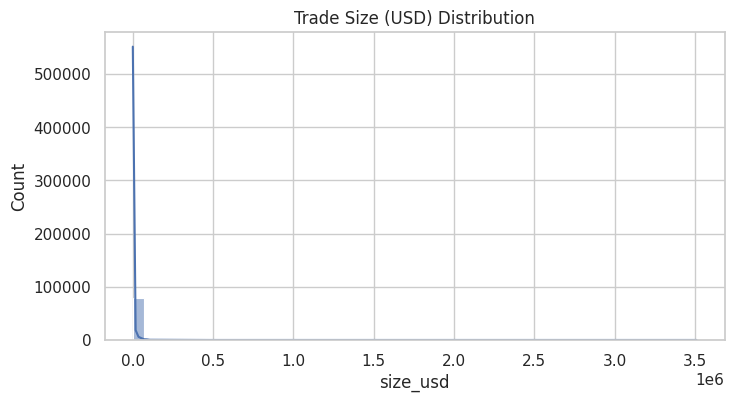

In [73]:
#Step 6: Basic EDA Visuals
# Trade Size (USD) Distribution
plt.figure(figsize=(8,4))
sns.histplot(merged_df['size_usd'], kde=True, bins=50)
plt.title("Trade Size (USD) Distribution")
plt.savefig("outputs/trade_size_distribution.png")
plt.show()

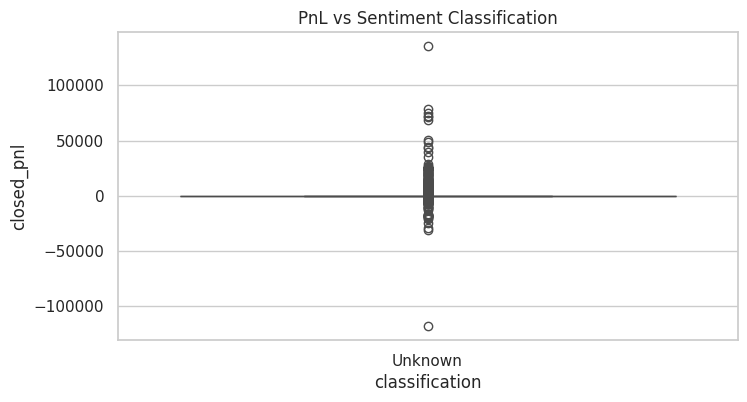

In [74]:
# PnL vs Sentiment
plt.figure(figsize=(8,4))
sns.boxplot(x='classification', y='closed_pnl', data=merged_df)
plt.title("PnL vs Sentiment Classification")
plt.savefig("outputs/pnl_sentiment_boxplot.png")
plt.show()

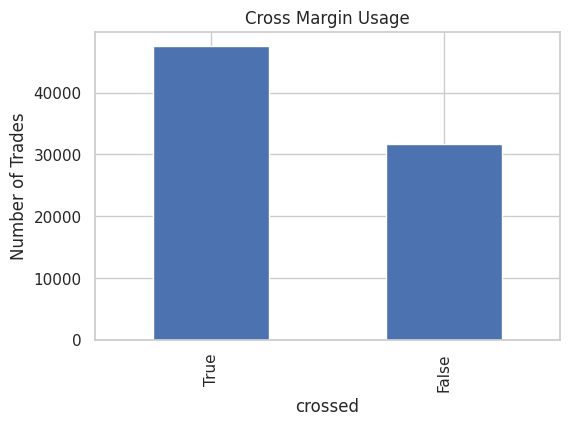

In [75]:
# Cross Margin Usage
plt.figure(figsize=(6,4))
crossed_counts = merged_df['crossed'].value_counts()
crossed_counts.plot(kind='bar')
plt.title("Cross Margin Usage")
plt.ylabel("Number of Trades")
plt.savefig("outputs/crossed_usage.png")
plt.show()

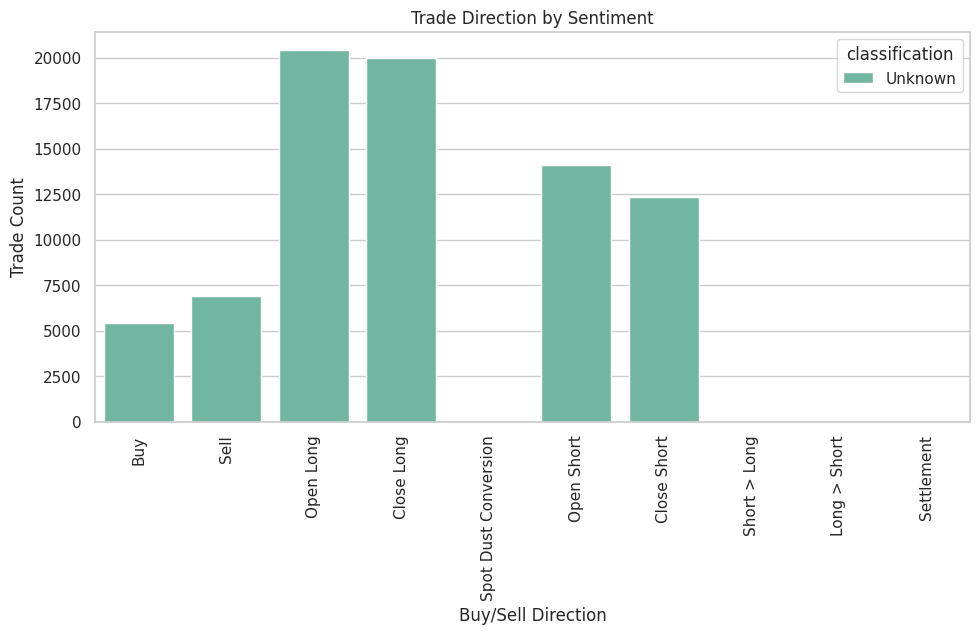

In [88]:
# Trade Direction Count
plt.figure()
sns.countplot(data=merged_df, x='direction', hue='classification', palette='Set2')
plt.title("Trade Direction by Sentiment")
plt.xlabel("Buy/Sell Direction")
plt.ylabel("Trade Count")
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig("outputs/trade_direction_by_sentiment.png")
plt.show()


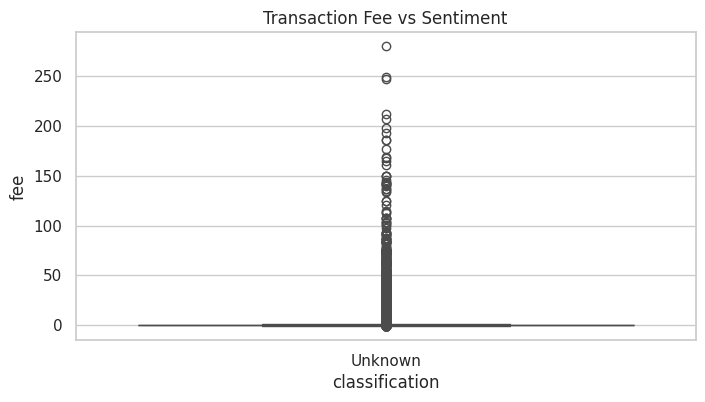

In [76]:
#Boxplot of Fees vs Sentiment
plt.figure(figsize=(8,4))
sns.boxplot(x='classification', y='fee', data=merged_df)
plt.title("Transaction Fee vs Sentiment")
plt.savefig("outputs/fee_vs_sentiment.png")
plt.show()

In [78]:
#Step 7: Compare Fear vs Greed Periods
fear_trades = merged_df[merged_df['classification'] == 'Fear']
greed_trades = merged_df[merged_df['classification'] == 'Greed']

print("Fear Period Avg Size (USD):", round(fear_trades['size_usd'].mean(), 2))
print("Greed Period Avg Size (USD):", round(greed_trades['size_usd'].mean(), 2))
print("Fear Period Avg PnL:", round(fear_trades['closed_pnl'].mean(), 2))
print("Greed Period Avg PnL:", round(greed_trades['closed_pnl'].mean(), 2))


Fear Period Avg Size (USD): nan
Greed Period Avg Size (USD): nan
Fear Period Avg PnL: nan
Greed Period Avg PnL: nan


In [59]:
#Step 8: Save Merged Dataset
merged_df.to_csv("csv_files/merged_trader_sentiment.csv", index=False)

print("notebook_1.ipynb execution complete. Proceed to notebook_2.ipynb for deeper analysis.")

notebook_1.ipynb execution complete. Proceed to notebook_2.ipynb for deeper analysis.
